# Catalogs

`ztfimg.catalog` provides tools query catalogs using the [vizier service](https://vizier.cds.unistra.fr/viz-bin/VizieR) through the `astroquery` package. 

***
## download a catalog

let's load an image and get the gaiadr3 catalog ("I/355/gaiadr3" from vizier).

### Get the image center position

In [2]:
import ztfimg
qimg = ztfimg.ScienceQuadrant.from_filename("ztf_20200924431759_000655_zr_c13_o_q3_sciimg.fits",
                                   as_path=False)

The image centroid is given by the `get_center()` method

In [3]:
radec = qimg.get_center(system="radec") # default is xy, so pixel units
radec

array([57.99904634, 35.74536002])

### query for the catalog

let's get the cone search catalog with a 1 deg radius around the image center ; 1 deg is slightly more than the Quadrant half diagonal

In [4]:
from ztfimg import catalog

In [5]:
%%time
cat = catalog.download_vizier_catalog("I/355/gaiadr3", radec, radius=0.7)

CPU times: user 2.51 s, sys: 89.3 ms, total: 2.6 s
Wall time: 5.03 s


The ra, dec columns are copies of 'RA_ICRS', 'DE_ICRS' (by default, see download_vizier_catalog options) to harmonize the code. 

### let's see how it looks.

For that we will :
1. show the image
2. convert the ra, dec coordinates into x,y pixels
3. plot the expected object location

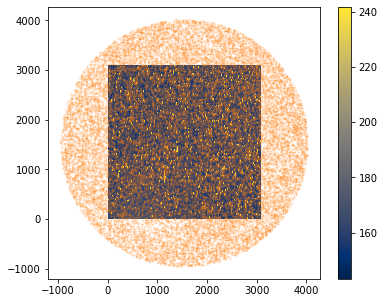

In [6]:
%matplotlib inline

# show the data
fig = qimg.show()
# access the main panel axes
ax = fig.axes[0]

# Converts catalog's ra,dec into pixel's x, y
x, y = qimg.radec_to_xy(*cat[["ra", "dec"]].values.T)

# show the expected catalog star location within the image
ax.scatter(x,y, s=1, marker="x", color="C1", alpha=0.2)

and let's zoom in

(1420.0, 1620.0)

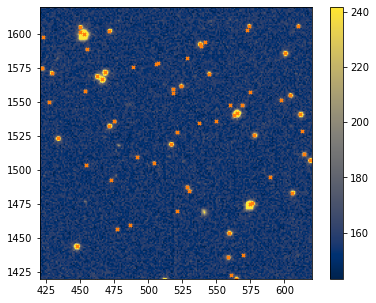

In [7]:
%matplotlib inline

# show the data
fig = qimg.show()
# access the main panel axes
ax = fig.axes[0]

# Converts catalog's ra,dec into pixel's x, y
x, y = qimg.radec_to_xy(*cat[["ra", "dec"]].values.T)

# show the expected catalog star location within the image
# -> changing the plot properties
ax.scatter(x,y, s=10, marker="x", color="C1", alpha=1)

# + zoom
ax.set_xlim(420,620)
ax.set_ylim(1420,1620)

### catalog short names

To simplify the user's experience, a few catalog name have short-names. e.g. "gaia" or "gaiadr3" is understood as "I/355/gaiadr3". See complete list in `download_vizier_catalog()` docstrings

***
## quadrant.get_catalog()

The `get_catalog()` method of quadrants provide a short cut to the above manual catalog extraction. It includes the addition of the pixel (x, y) coordinates within the catalog data frame (if a wcs solution is not available, they will be set to NaN) and, optionally, is able to discard catalog entries outside the image footprint. 

we use the "gaia" shortname for "I/355/gaiadr3".

In [8]:
cat = qimg.get_catalog("gaiadr3")

The x,y columns have been added

In [9]:
cat.columns

Index(['RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx',
       'e_Plx', 'PM', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'RUWE', 'FG', 'e_FG',
       'Gmag', 'e_Gmag', 'FBP', 'e_FBP', 'BPmag', 'e_BPmag', 'FRP', 'e_FRP',
       'RPmag', 'e_RPmag', 'BP-RP', 'RVDR2', 'e_RVDR2', 'Tefftemp', 'loggtemp',
       'PS1', 'SDSSDR13', 'SkyMapper2', 'URAT1', 'GmagCorr', 'e_GmagCorr',
       'FGCorr', 'RAJ2000', 'DEJ2000', 'ra', 'dec', 'x', 'y'],
      dtype='object')

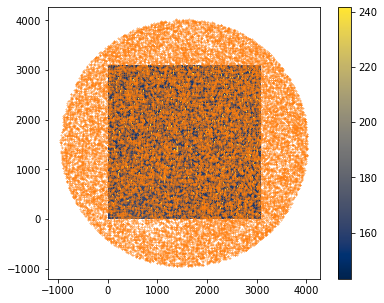

In [10]:
%matplotlib inline

# show the data
fig = qimg.show()
# access the main panel axes
ax = fig.axes[0]

# show the expected catalog star location within the image
ax.scatter(*cat[["x", "y"]].values.T, s=1, marker="x", color="C1", alpha=0.5)

### Including the in_fov option

In [11]:
cat = qimg.get_catalog("gaiadr3", in_fov=True)

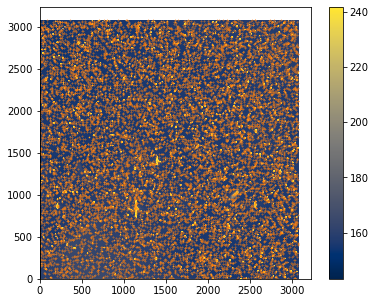

In [12]:
%matplotlib inline

# show the data
fig = qimg.show()
# access the main panel axes
ax = fig.axes[0]

# show the expected catalog star location within the image
ax.scatter(*cat[["x", "y"]].values.T, s=1, marker="x", color="C1", alpha=0.5)

***
## get_catalog from CCD

The CCD object has a `get_catalog()` method while not directly holding a wcs solution (they are quadrant based). the `get_catalog()` ccd method atually loops over the ccd quadrants' and updates their x and y position to convert them into ccd pixel coordinates (and not quadrants). This method can also, optionnaly, drop duplicated entries. 

In [13]:
ccdimg = qimg.get_ccd()

In [14]:
cat_ccd = ccdimg.get_catalog("gaia", in_fov=True) # drop_duplicate=True is useless with in_fov (per quadrant)

In [15]:
cat_ccd.head()

,Source,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,URAT1,GmagCorr,e_GmagCorr,FGCorr,RAJ2000,DEJ2000,ra,dec,x,y
0,218916785180403840,59.445642,0.1874,35.279556,0.1277,-0.0412,0.2436,0.421,-0.062,0.278,...,627052425,18.890215,0.003396,523.429993,59.445643,35.279554,59.445642,35.279556,5782.220523,25.633352
1,218916819540141184,59.425020,0.4804,35.278836,0.3261,0.0473,0.6854,3.028,0.850,0.761,...,<NA>,20.137619,0.005522,165.919998,59.425016,35.278849,59.425020,35.278836,5722.498953,20.593437
2,218916823837087104,59.433739,4.0164,35.273722,1.9008,NaN,NaN,NaN,NaN,NaN,...,<NA>,20.996605,0.018416,75.214996,59.433739,35.273722,59.433739,35.273722,5748.565750,3.460110
3,218916853899876096,59.434783,0.1885,35.275006,0.1218,0.3394,0.2423,1.570,1.389,0.284,...,627052410,18.859005,0.003363,538.700012,59.434775,35.275002,59.434783,35.275006,5751.400404,8.149568
4,218916853899882752,59.429601,0.1646,35.281860,0.1097,0.5057,0.2134,2.468,-0.720,0.251,...,627052406,18.641842,0.003277,657.979980,59.429605,35.281870,59.429601,35.281860,5735.334032,31.891531


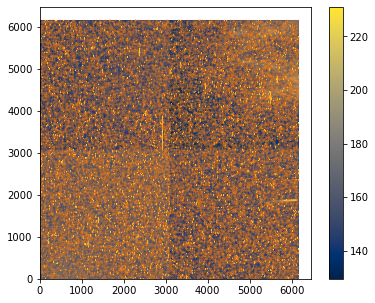

In [17]:
%matplotlib inline

# show the data
fig = ccdimg.show()
# access the main panel axes
ax = fig.axes[0]

# show the expected catalog star location within the image
ax.scatter(*cat_ccd[["x", "y"]].values.T, s=1, marker="x", color="C1", alpha=0.2)

(6060.0, 6260.0)

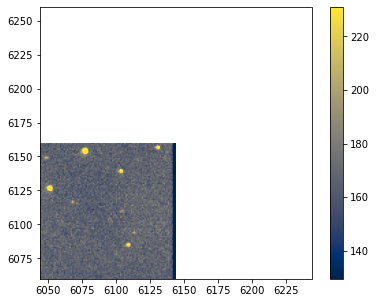

In [18]:
%matplotlib inline

# show the data
fig = ccdimg.show()
# access the main panel axes
ax = fig.axes[0]

# show the expected catalog star location within the image
ax.scatter(*cat_ccd[["x", "y"]].values.T, s=1, marker="x", color="C1", alpha=0.2)

# zooming in the center where quadrant's meet
ax.set_xlim( ccdimg.shape[1]-100, ccdimg.shape[1]+100)
ax.set_ylim( ccdimg.shape[0]-100, ccdimg.shape[0]+100)